In [ ]:
Как избавиться от коллизии?
Открытая адрессация
hash(x)= x%10
 33
    48
    3
    333
    107
    1008
    88

Любое место открыто для любой записи    
linear probing 


L.f = #elm/len(mass) <<1

In [ ]:
Закрытая адресация
с связными списками

In [ ]:
хэш(0:inf)%N
Можем заранее подготовиться и сделать больше ключей для распределения

Она должна быстро вычисляться, быть безопасной



In [ ]:
от key заводим сразу много хэш функций. Можно брать остатки от деления хэша. Нужно хотя бы 3. 
h1 = pychash
h2=h1(h1(x))

Фильтр Блума
На битовом массиве
000000000000000000000000000000000000000000
Заполнили нулями 
Можем при добавлении элемента заменить на 1

если 0, то его нет
А если 1, то возможно есть

1. (3 балла) Модель идеальной хеш-функции.

In [39]:
# функция на одном листе

import numpy as np
import time
import random
from random import randint
import sys
import string


def genColisions(M,N):
    class HashTable:
        def __init__(self):
            self.size = N
            self.cells = [None] * self.size
            self.Colisions = 0
            #print("len", len(self.cells), self.cells)
            
        def put(self,key,data):
            hashvalue = key%len(self.cells)
            #print(hashvalue, self.cells)
    
            if self.cells[hashvalue] == None:
                self.cells[hashvalue] = data
                #print("Add", data, self.cells)
            else:
                if self.cells[hashvalue] == data:
                    self.Colisions += 1
                    return 1
                    
                else:
                    for i in range(len(self.cells)):
                        if self.cells[hashvalue] == None or self.cells[hashvalue] == data:
                            break
                        #print(self.cells[hashvalue])
                        if hashvalue == len(self.cells)-1:
                            #print("0")
                            hashvalue = 0
                            #print(self.cells, hashvalue)
                        else:
                            hashvalue += 1
                            #print("1")
                            #print(self.cells, hashvalue)
                        self.Colisions += 1
                    
                    #print(hashvalue)
                    if self.cells[hashvalue] == None:
                        #print(hashvalue)
                        self.cells[hashvalue] = data
                    elif self.cells[hashvalue] == data:
                        return 1 
                    else:
                        self.cells[hashvalue] = data
                        
    
        def __getitem__(self,key):
            return self.get(key)
    
        def __setitem__(self,key,data):
            self.put(key,data)

    H=HashTable()
    test = list(randint(0, M) for i in range(0,M))
    #print(test)
    
    for i in test:
        w = ''.join([random.choice(string.ascii_letters + string.digits) for n in range(5)])
        #print(w)
        H[i] = w
        
    return H.Colisions
   

genColisions(1,10)

0

Вася решил узнать, сколько коллизий будет в среднем, если в пустую хеш-таблицу вставить M различных значений. А вычислять, как всегда, вам.


In [4]:
# для разной длины
import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 

N = 100
M = [n for n in range(1,50)] 
Lengthes = []
Colisions = []
for x in M:
    print(x)
    all_times = []
    for y in range(3):
        all_times.append(genColisions(x,N))
    Lengthes.append(x)
    Colisions.append(np.mean(all_times))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


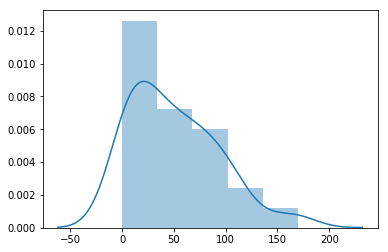

In [5]:
import seaborn as sns, numpy as np
ax = sns.distplot(Colisions)


In [7]:
# для одинаковой длины
import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 

N = 100
M = [50]*50 
Lengthes = []
Colisions = []
for x in M:
    print(x)
    Colisions.append(genColisions(x,N))
    Lengthes.append(x)


50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50


147.48


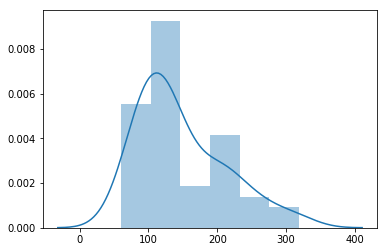

In [10]:
import seaborn as sns, numpy as np
ax = sns.distplot(Colisions)
print(np.mean(Colisions))

In [11]:
# для таблиц разного размера
import numpy as np
import time
import random


N = [i for i in range(10,100)] 

Lengthes = []
Colisions = []
for i in N:
    M = [r for r in range(1,i)] 
    all_times = []
    for j in M:
        print(i,j)
        all_times.append(int(genColisions(j,i)))
    Lengthes.append(j)
    Colisions.append(sum(all_times)/len((all_times)))

10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
16 15
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
19 15
19 16
19 17
19 18
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
21 15
21 16
21 17
21 18
21 19
21 20
22 1
22 2
22 3
22 4
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
2

63 1
63 2
63 3
63 4
63 5
63 6
63 7
63 8
63 9
63 10
63 11
63 12
63 13
63 14
63 15
63 16
63 17
63 18
63 19
63 20
63 21
63 22
63 23
63 24
63 25
63 26
63 27
63 28
63 29
63 30
63 31
63 32
63 33
63 34
63 35
63 36
63 37
63 38
63 39
63 40
63 41
63 42
63 43
63 44
63 45
63 46
63 47
63 48
63 49
63 50
63 51
63 52
63 53
63 54
63 55
63 56
63 57
63 58
63 59
63 60
63 61
63 62
64 1
64 2
64 3
64 4
64 5
64 6
64 7
64 8
64 9
64 10
64 11
64 12
64 13
64 14
64 15
64 16
64 17
64 18
64 19
64 20
64 21
64 22
64 23
64 24
64 25
64 26
64 27
64 28
64 29
64 30
64 31
64 32
64 33
64 34
64 35
64 36
64 37
64 38
64 39
64 40
64 41
64 42
64 43
64 44
64 45
64 46
64 47
64 48
64 49
64 50
64 51
64 52
64 53
64 54
64 55
64 56
64 57
64 58
64 59
64 60
64 61
64 62
64 63
65 1
65 2
65 3
65 4
65 5
65 6
65 7
65 8
65 9
65 10
65 11
65 12
65 13
65 14
65 15
65 16
65 17
65 18
65 19
65 20
65 21
65 22
65 23
65 24
65 25
65 26
65 27
65 28
65 29
65 30
65 31
65 32
65 33
65 34
65 35
65 36
65 37
65 38
65 39
65 40
65 41
65 42
65 43
65 44
65 45
65 46
6

86 71
86 72
86 73
86 74
86 75
86 76
86 77
86 78
86 79
86 80
86 81
86 82
86 83
86 84
86 85
87 1
87 2
87 3
87 4
87 5
87 6
87 7
87 8
87 9
87 10
87 11
87 12
87 13
87 14
87 15
87 16
87 17
87 18
87 19
87 20
87 21
87 22
87 23
87 24
87 25
87 26
87 27
87 28
87 29
87 30
87 31
87 32
87 33
87 34
87 35
87 36
87 37
87 38
87 39
87 40
87 41
87 42
87 43
87 44
87 45
87 46
87 47
87 48
87 49
87 50
87 51
87 52
87 53
87 54
87 55
87 56
87 57
87 58
87 59
87 60
87 61
87 62
87 63
87 64
87 65
87 66
87 67
87 68
87 69
87 70
87 71
87 72
87 73
87 74
87 75
87 76
87 77
87 78
87 79
87 80
87 81
87 82
87 83
87 84
87 85
87 86
88 1
88 2
88 3
88 4
88 5
88 6
88 7
88 8
88 9
88 10
88 11
88 12
88 13
88 14
88 15
88 16
88 17
88 18
88 19
88 20
88 21
88 22
88 23
88 24
88 25
88 26
88 27
88 28
88 29
88 30
88 31
88 32
88 33
88 34
88 35
88 36
88 37
88 38
88 39
88 40
88 41
88 42
88 43
88 44
88 45
88 46
88 47
88 48
88 49
88 50
88 51
88 52
88 53
88 54
88 55
88 56
88 57
88 58
88 59
88 60
88 61
88 62
88 63
88 64
88 65
88 66
88 67
88 68
88 6

67.0554589507


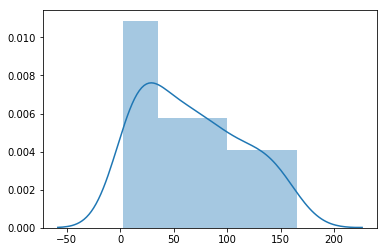

In [12]:
import seaborn as sns, numpy as np
ax = sns.distplot(Colisions)
print(np.mean(Colisions))

2. (3 балла) Реальное время поиска.

In [13]:
class ListBlock:
    def __init__(self, value = None, next = None):
        self.value = value
        self.next = next

class LinkedList:
    def __init__(self):
        self.first = None
        self.last = None
        self.length = 0
    
    def add(self, elem):
        self.length += 1
        if self.first == None:
            self.last = self.first = ListBlock(elem)
        else:
            self.last.next = self.last = ListBlock(elem)
            
    def Del_end(self):
        curr = self.first
        while curr.next != None:
            if curr.next == self.last: 
                break
            curr = curr.next
        curr.next = None
        self.last = curr
    
    def search_elm_by_value(self, elm):
        if (self.first == None):
            return -1
        curr = self.first
        calc = 0
        while curr != None:
            if curr.value[0] == elm:
                return curr.value
            curr = curr.next
            calc += 1
        if curr == None:
            return -1
        
    def search_elm_by_index(self, index):
        if (self.first == None):
            return -1
        curr = self.first
        calc = 0
        while curr != None:
            if calc == index:
                return curr.value
            curr = curr.next
            calc += 1
        if curr == None:
            return -1
        
    def Del_elm_by_index(self,index):
        if (self.first == None):
            return -1
        curr = self.first
        count = 0
        if index == 0:
            self.first = self.first.next
            return 
        while curr != None:
            if count == index:
                if curr.next == None:
                    self.last = curr
                old.next = curr.next 
                break
            old = curr  
            curr = curr.next
            count += 1
            
    def Del_elm_by_value(self,data):
        if (self.first == None):
            return -1
        else:
            curr  = self.first
            prev = None
            while curr.value != data and curr.next != None:
                prev = curr
                curr = curr.next

            if curr.value == data:
                if curr == self.first:
                    if curr.next == None:
                        self.first = None
                    else:
                        self.first = curr.next
                else:
                    if curr.next == None:
                        prev.next = None
                    else:
                        prev.next = curr.next
                return
            else:
                return -1
        
    def __str__(self):
        if self.first != None:
            curr = self.first
            out = 'LinkedList [ ' +str(curr.value) +' '
            while curr.next != None:
                curr = curr.next
                out += str(curr.value) + ' '
            return out + ']'
        else:
            return 'LinkedList []'
        
    def reverse(self):
        curr = self.first 
        prev = None       
        while curr != None:
            nextt =  curr.next  
            curr.next = prev
            prev = curr
            curr = nextt
        self.first = prev 


In [30]:
import numpy as np
import time
import random
from random import randint
import sys
import string


def genColisions(M,N):

    class HashTable:
        def __init__(self):
            self.size = N
            self.cells = [None] * self.size
            self.data = [None] * self.size
    
        def put(self,key,data):
            hashvalue = hash(key)%len(self.cells)
    
            if self.cells[hashvalue] == None:
                self.cells[hashvalue] = key
                self.data[hashvalue] = data
            else:
                if self.cells[hashvalue] == key:
                    self.data[hashvalue] = data  #replace
                else:
                    nextslot = (hashvalue+1)%len(self.cells)
                    calc = 0
                    while self.cells[nextslot] != None and self.cells[nextslot] != key and calc < 2*self.size:
                        nextslot = (nextslot+1)%len(self.cells)
                        calc += 1
    
                    if self.cells[nextslot] == None:
                        self.cells[nextslot] = key
                        self.data[nextslot] = data
                    else:
                        self.data[nextslot] = data #replace
    

        def get(self,key):
            startcell = hash(key)%len(self.cells)
    
            data, stop, found = None, False, False
            position = startcell
            while self.cells[position] != None and not found and not stop:
                if self.cells[position] == key:
                    found = True
                    data = self.data[position]
                else:
                    position = (position+1)%len(self.cells)
                    if position == startcell:
                        stop = True
            return data
    
        def __getitem__(self,key):
            return self.get(key)
    
        def __setitem__(self,key,data):
            self.put(key,data)

    H=HashTable()
    test = list(randint(0, M) for i in range(0,M))
    #print(test)
    for i in test:
        w = ''.join([random.choice(string.ascii_letters + string.digits) for n in range(5)])
        #print(i)
        H[i] = w
        #print(H.cells)
    return H
        

N = 1000
M = [i for i in range(100,1000)] 

Time = []
for j in range(100):
    all_times = []
    for i in M:
        #print(i,j)
        H = genColisions(j,i)
        for i in H.cells:
            if i != None:
                start = time.time()
                H.get(i)
                end = time.time()
                all_times.append(end-start)
    
    Time.append(np.mean(all_times))
    


/home/pavel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pavel/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
print(np.mean(Time[1:]))

6.49664278146e-07


In [37]:
import numpy as np
import time
import random
import sys
import string


def genColisions(M,N):
    class HashTable:
        def __init__(self):
            self.size = N
            self.cells = [LinkedList() for i in range(self.size)]
            #print("len", len(self.cells), self.cells)
            
        def put(self,key,data):
            hashvalue = hash(key)%len(self.cells)
            #print(hashvalue, self.cells)
    
            if self.cells[hashvalue].first == None:
                self.cells[hashvalue].add([key,data]) 
                #print("Add", data, self.cells)
            else:
                if self.cells[hashvalue].first.value == data:
                    return 1
                else:
                    self.cells[hashvalue].add([key,data]) 
                        
        def get(self,key):
            hashvalue = hash(key)%len(self.cells)
            data = self.cells[hashvalue].search_elm_by_value(key)
            return data
     
    
        def __getitem__(self,key):
            return self.get(key)
    
        def __setitem__(self,key,data):
            self.put(key,data)

    H=HashTable()
    test = list(randint(0, M) for i in range(0,M))
    #print(test)
    p = 0
    for i in test:
        w = ''.join([random.choice(string.ascii_letters + string.digits) for n in range(5)])
        #print(w)
        H[i] = w #H[i] = w
        p = i
    #print(H.cells)
    #for i in range(len(H.cells)):
        #print(i)
    #print(H.get(p)[1])
    #print(H.cells[1])
    return H



N = 1000
M = [i for i in range(100,1000)] 

Time = []
for j in range(100):
    all_times = []
    for i in M:
        #print(i,j)
        H = genColisions(j,i)
        for i in H.cells:
            if i != None:
                start = time.time()
                H.get(i)
                end = time.time()
                all_times.append(end-start)
    
    Time.append(np.mean(all_times))
    


In [38]:
print(np.mean(Time[1:]))

6.93899170583e-07


Фильтер блума 

In [2]:
from random import randint


class Node:

    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.value = data
        #print(data)
  
          
class Tree:
    def __init__(self):
        self.root = None
        
    def kill_tree(self):
        self.root = None

    def get_root(self):
        return self.root
    
    def length(self):
        return self.size

    def add_node(self, data):
        node = self.root
        #print("Node is", node)
        if node == None:
            #print("Tree is empty!")
            self.root = Node(data)
        else:
            self._add(node, data)
            #print(node, data)
                    
    def _add(self, node, data):
        #print(node, data)
        if data < node.value:
            if node.left != None:
                self._add(node.left, data)
            else:
                node.left = Node(data)
                #print(node.left.value)
        if data == node.value:
            return -1
        if data > node.value:
            if node.right != None:
                self._add(node.right, data)
            else:
                node.right = Node(data)
                #print(node.right.value)


    def search(self, data):
        node = self.root
        while node != None:
            if node.value == data:
                return node
            if node.value > data:
                node = node.left
            else:
                node = node.right
        return None
            
    def __repr__(self):
        self.sorted = []
        self.get_inorder(self.root)
        return str(self.sorted)

    def get_inorder(self, node):
        if node:
            self.get_inorder(node.left)
            self.sorted.append(str(node.value))
            self.get_inorder(node.right)

tree = Tree()
for elm in range(100):
        rand = randint(elm, 100)
        #print(rand)
        tree.add_node(str(rand))
print(tree)
t = str(tree)
print(t)

['100', '13', '15', '23', '25', '26', '27', '29', '30', '34', '35', '40', '41', '42', '45', '46', '51', '52', '54', '60', '61', '64', '65', '68', '70', '71', '72', '73', '75', '77', '78', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
['100', '13', '15', '23', '25', '26', '27', '29', '30', '34', '35', '40', '41', '42', '45', '46', '51', '52', '54', '60', '61', '64', '65', '68', '70', '71', '72', '73', '75', '77', '78', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [13]:
import numpy as np
import time
import random
from random import randint
import sys
import string


def BloomFilter(words, word):
    
    class HashTable:
        def __init__(self):
            self.size = 1000
            self.cells = [None] * self.size
    
        def put(self,key):
            hashvalue = hash(key)%len(self.cells)
    
            if self.cells[hashvalue] == None:
                self.cells[hashvalue] = key
                return "ok"
            else:
                if self.cells[hashvalue] == key:
                    return "fail"
     
        def __getitem__(self,key):
            return self.get(key)
    
        def __setitem__(self,key,data):
            self.put(key,data)

    H = HashTable()
    H.size = len(words)*100
    for i in words:
        H.put(i)
    return H.put(word)
    
print(BloomFilter(["woiird", "wowwwd", "wqqq", "wqqqord", "wergord", "wordrtd", "woffrd",], "word"))

fail


In [36]:
import numpy as np
import time
import random
from random import randint
import sys
import string


def BloomFilter(words, word):
    
    class HashTable:
        def __init__(self):
            self.size = N
            self.cells = [None] * self.size
    
        def put(self,key):
            hashvalue = hash(key)%len(self.cells)
    
            if self.cells[hashvalue] == None:
                self.cells[hashvalue] = key
                return "ok"
            else:
                if self.cells[hashvalue] == key:
                    return "fail"

     
        def __getitem__(self,key):
            return self.get(key)
    
        def __setitem__(self,key,data):
            self.put(key,data)

    H = HashTable()
    H.size = len(words)*100
    for i in words:
        H.put(i)
    return H.put(word)
    
print(BloomFilter(t, "1"))
print(BloomFilter(t, "100"))

fail
ok
